In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Employee_Attrition_Data_Set.csv")

In [3]:
df.describe()

,Employee ID,Age,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,40.561200,8948.750300,14.311100,1.958300,10.022797,26.632481,5.407000,2.992900
std,2886.89568,10.876483,3473.354793,8.742572,1.426171,5.823696,14.396393,2.943504,1.410833
min,1.00000,22.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,5895.000000,7.000000,1.000000,5.101189,14.509275,3.000000,2.000000
50%,5000.50000,41.000000,8982.500000,14.000000,2.000000,9.990978,27.122930,5.000000,3.000000
75%,7500.25000,50.000000,11928.250000,22.000000,3.000000,15.042273,39.148606,8.000000,4.000000
max,10000.00000,59.000000,14999.000000,30.000000,5.000000,20.000000,50.000000,10.000000,5.000000


In [4]:
df.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee ID            10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Job Role               10000 non-null  object 
 4   Department             10000 non-null  object 
 5   Monthly Income         10000 non-null  int64  
 6   Years at Company       10000 non-null  int64  
 7   Number of Promotions   10000 non-null  int64  
 8   Last Raise Percentage  10000 non-null  float64
 9   Distance from Office   10000 non-null  float64
 10  Job Satisfaction       10000 non-null  int64  
 11  Performance Rating     10000 non-null  int64  
 12  Attrition              10000 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


# Data cleaning

In [16]:
df.isnull().sum()


Employee ID              0
Age                      0
Gender                   0
Job Role                 0
Department               0
Monthly Income           0
Years at Company         0
Number of Promotions     0
Last Raise Percentage    0
Distance from Office     0
Job Satisfaction         0
Performance Rating       0
Attrition                0
dtype: int64

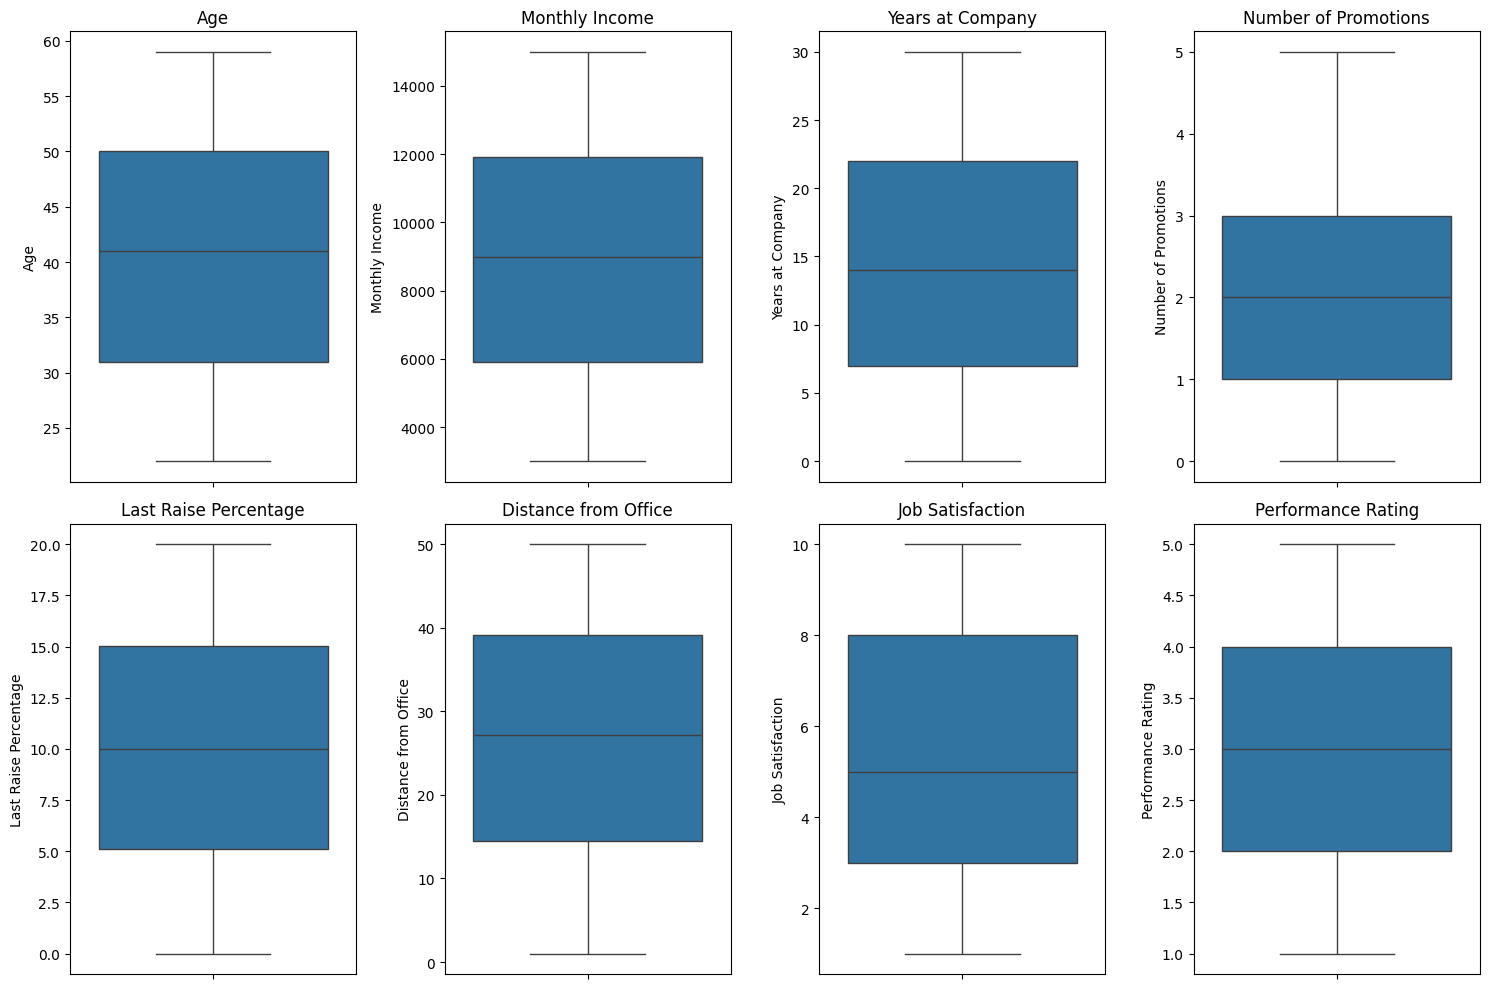

In [17]:
# 绘制数值特征的箱线图
numeric_features = ['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions', 'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction', 'Performance Rating']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [18]:
from scipy.stats import zscore

# 计算数值特征的Z-Score
z_scores = df[numeric_features].apply(zscore)

# 检测离群值
outliers = (z_scores.abs() > 3).any(axis=1)
print("离群值数量：", outliers.sum())
print(df[outliers])


离群值数量： 0
Empty DataFrame
Columns: [Employee ID, Age, Gender, Job Role, Department, Monthly Income, Years at Company, Number of Promotions, Last Raise Percentage, Distance from Office, Job Satisfaction, Performance Rating, Attrition]
Index: []


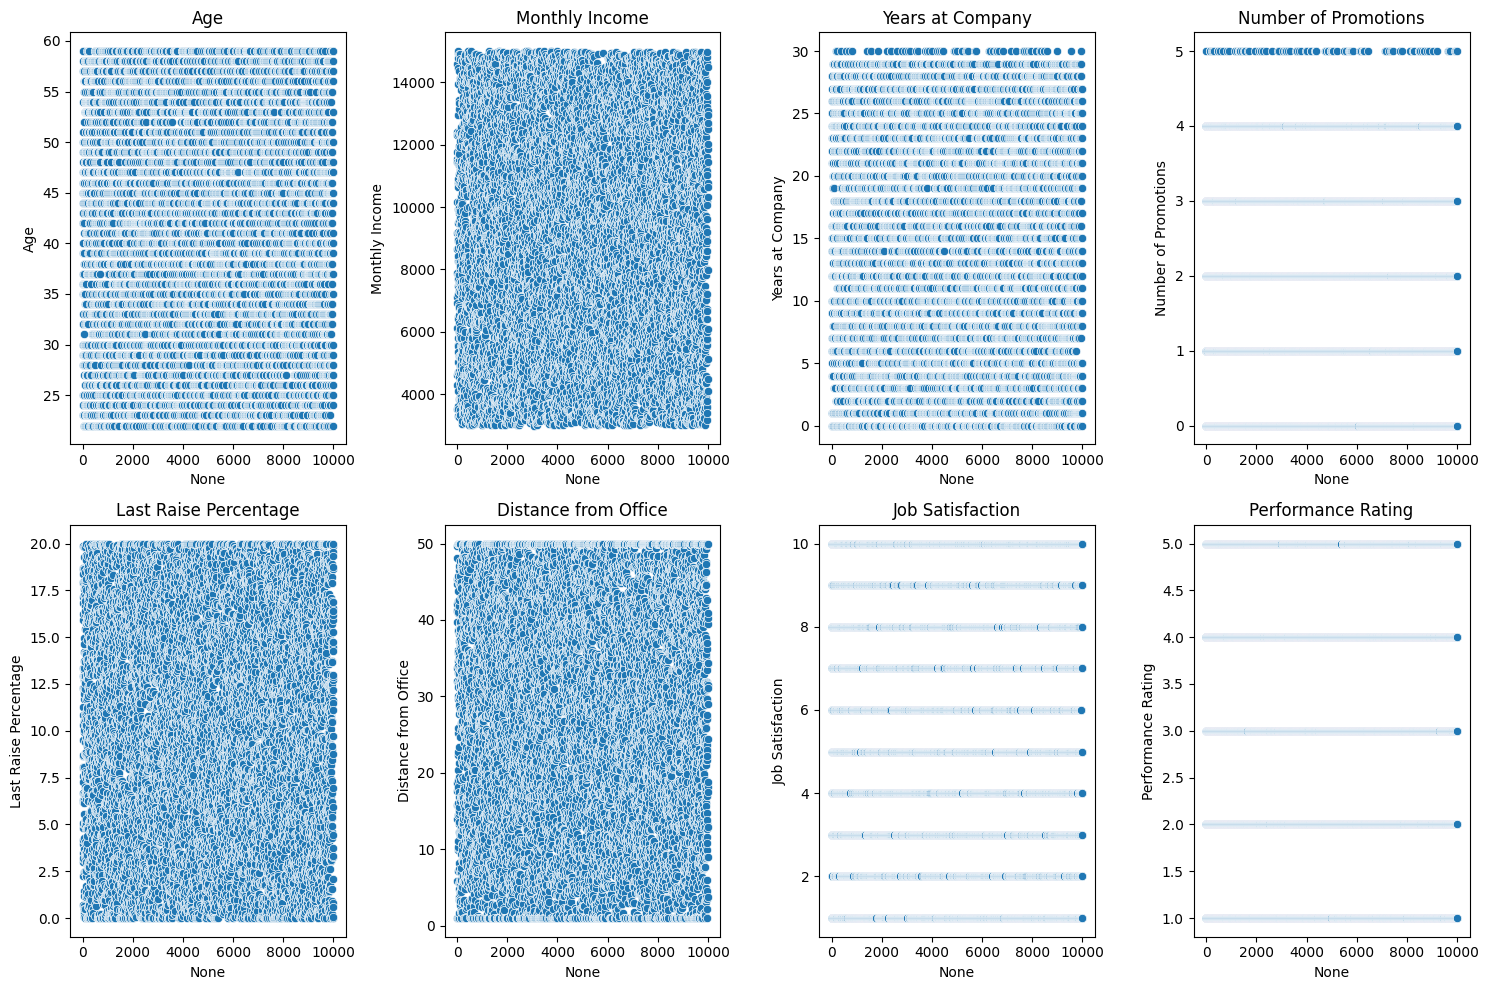

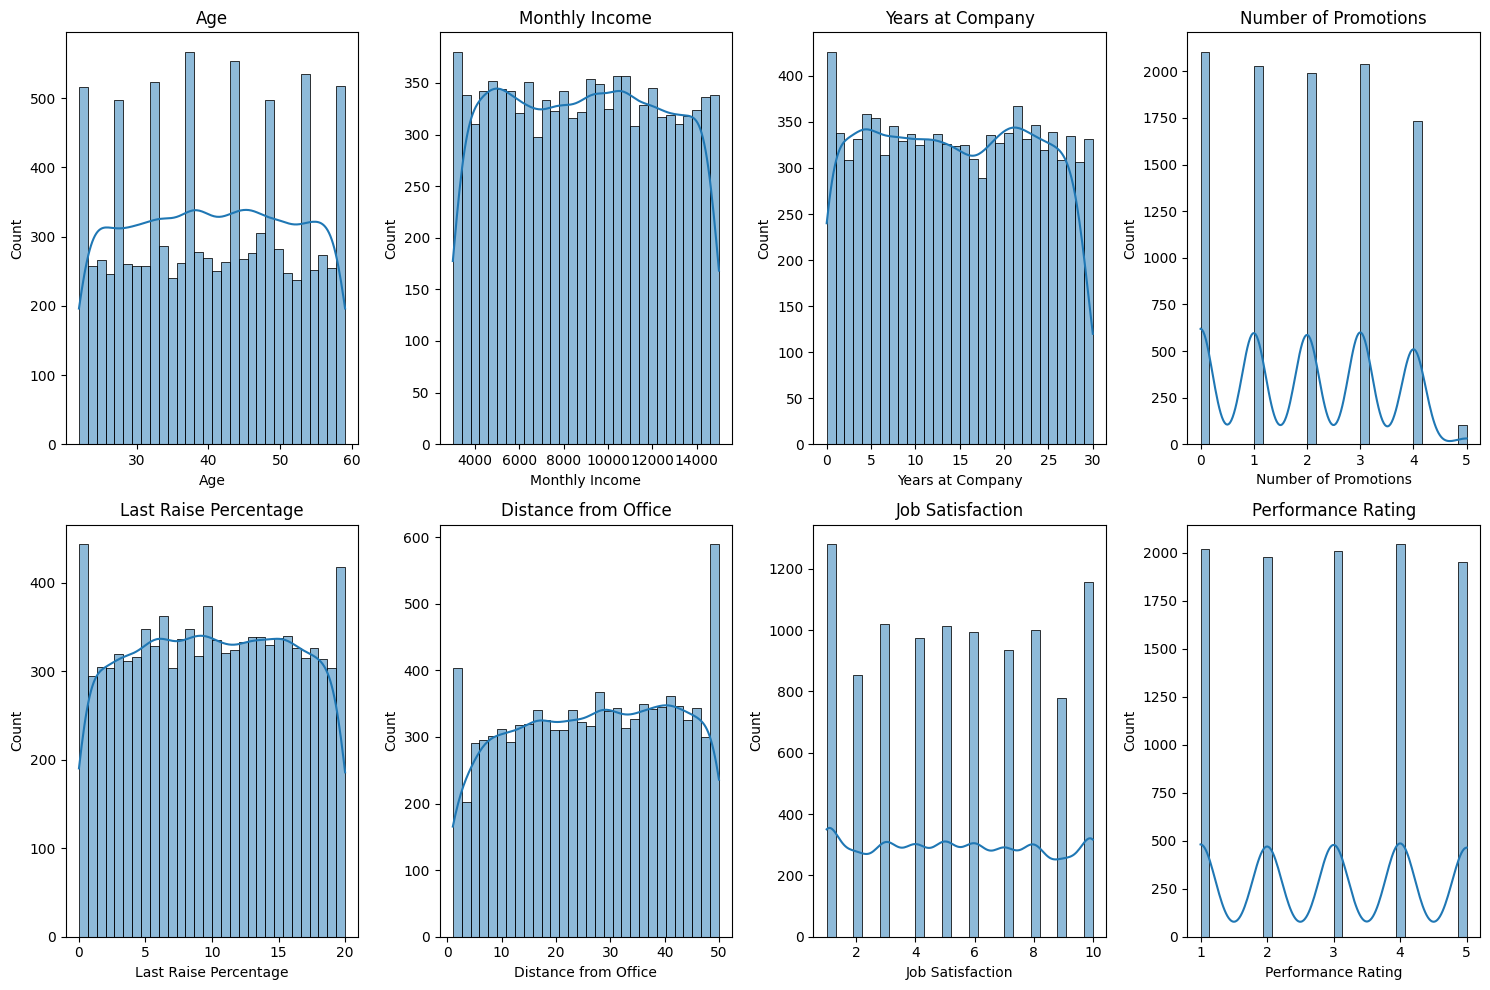

In [19]:
# 绘制数值特征的散点图
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(data=df, x=df.index, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

# 绘制数值特征的直方图
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


# EDA


In [20]:
df.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No


/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_1392/2707539251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job Satisfaction', y='Number of Promotions', data=df, ax=ax1, palette='tab10')
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_1392/2707539251.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job Satisfaction', y='Years at Company', data=df, ax=ax2, palette='tab10')
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_1392/2707539251.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job

<Axes: xlabel='Job Satisfaction', ylabel='Last Raise Percentage'>

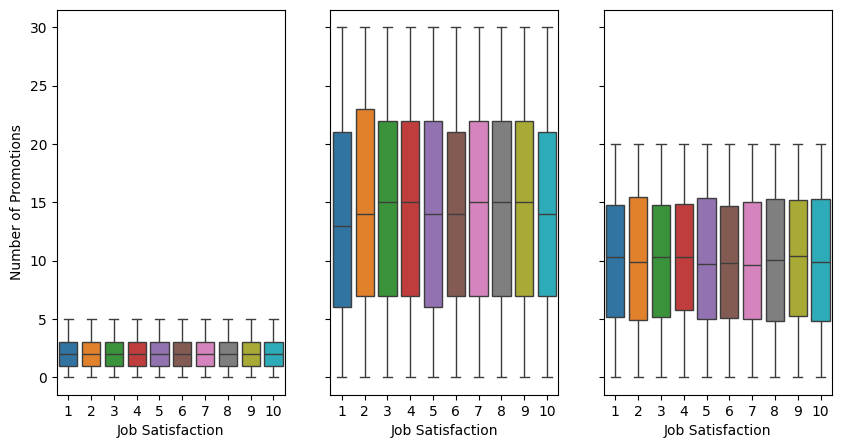

In [22]:
# 满意度和别的关系
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,5), sharey=True)
sns.boxplot(x='Job Satisfaction', y='Number of Promotions', data=df, ax=ax1, palette='tab10')
sns.boxplot(x='Job Satisfaction', y='Years at Company', data=df, ax=ax2, palette='tab10')
sns.boxplot(x='Job Satisfaction', y='Last Raise Percentage', data=df, ax=ax3, palette='tab10')

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_1392/4037152520.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job Satisfaction', y='Monthly Income', data=df, palette='tab10')


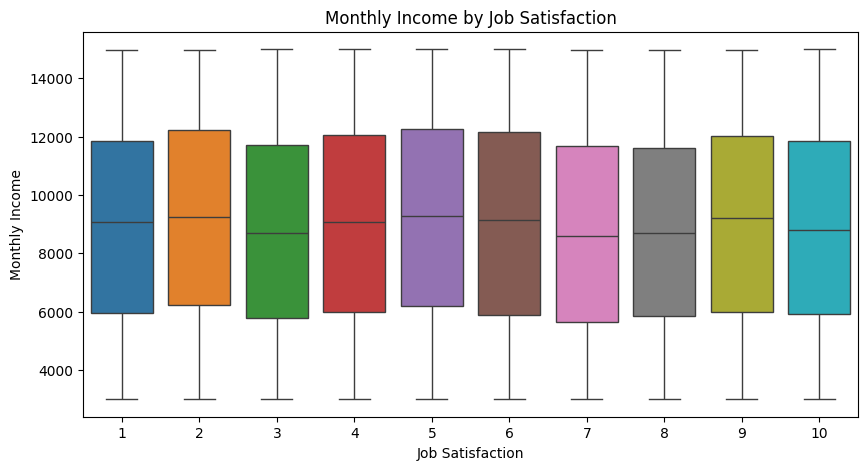

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Job Satisfaction', y='Monthly Income', data=df, palette='tab10')
plt.title('Monthly Income by Job Satisfaction')
plt.show()

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_1392/811519790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job Satisfaction', y='Performance Rating', data=df, palette='tab10')


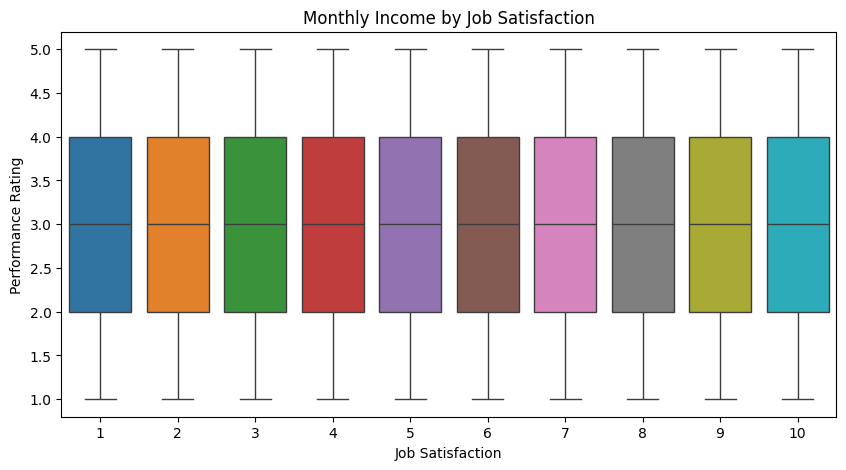

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Job Satisfaction', y='Performance Rating', data=df, palette='tab10')
plt.title('Monthly Income by Job Satisfaction')
plt.show()

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_1392/3850252916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job Satisfaction', y='Distance from Office', data=df, palette='tab10')


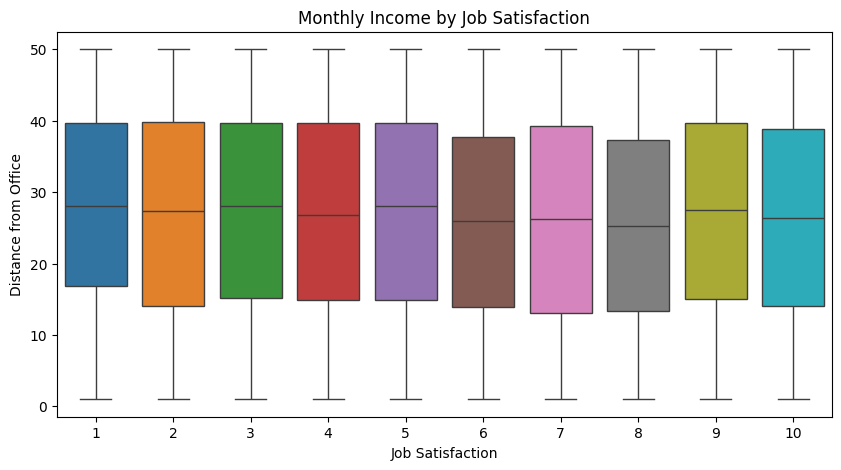

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Job Satisfaction', y='Distance from Office', data=df, palette='tab10')
plt.title('Monthly Income by Job Satisfaction')
plt.show()

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_1392/3729050174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job Satisfaction', y='Age', data=df, palette='tab10')


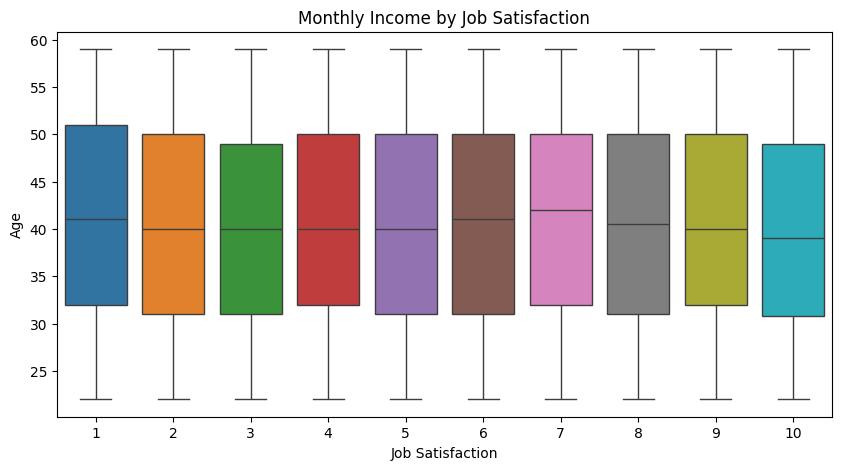

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Job Satisfaction', y='Age', data=df, palette='tab10')
plt.title('Monthly Income by Job Satisfaction')
plt.show()

In [29]:
df[df['Job Role']== 'HR']['Job Satisfaction'].describe()

count    2025.000000
mean        5.411358
std         2.946186
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Job Satisfaction, dtype: float64

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_1392/1912646857.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Last Raise Percentage', y='Monthly Income', data=df, palette='tab10')


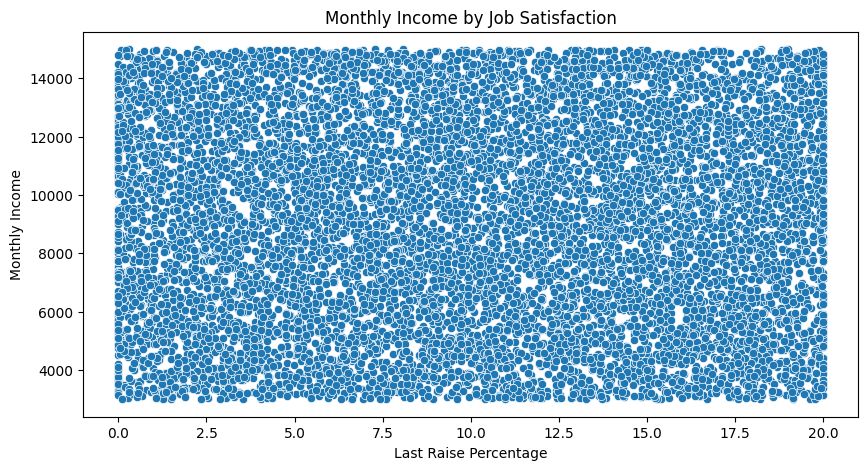

In [34]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Last Raise Percentage', y='Monthly Income', data=df, palette='tab10')
plt.title('Monthly Income by Job Satisfaction')
plt.show()

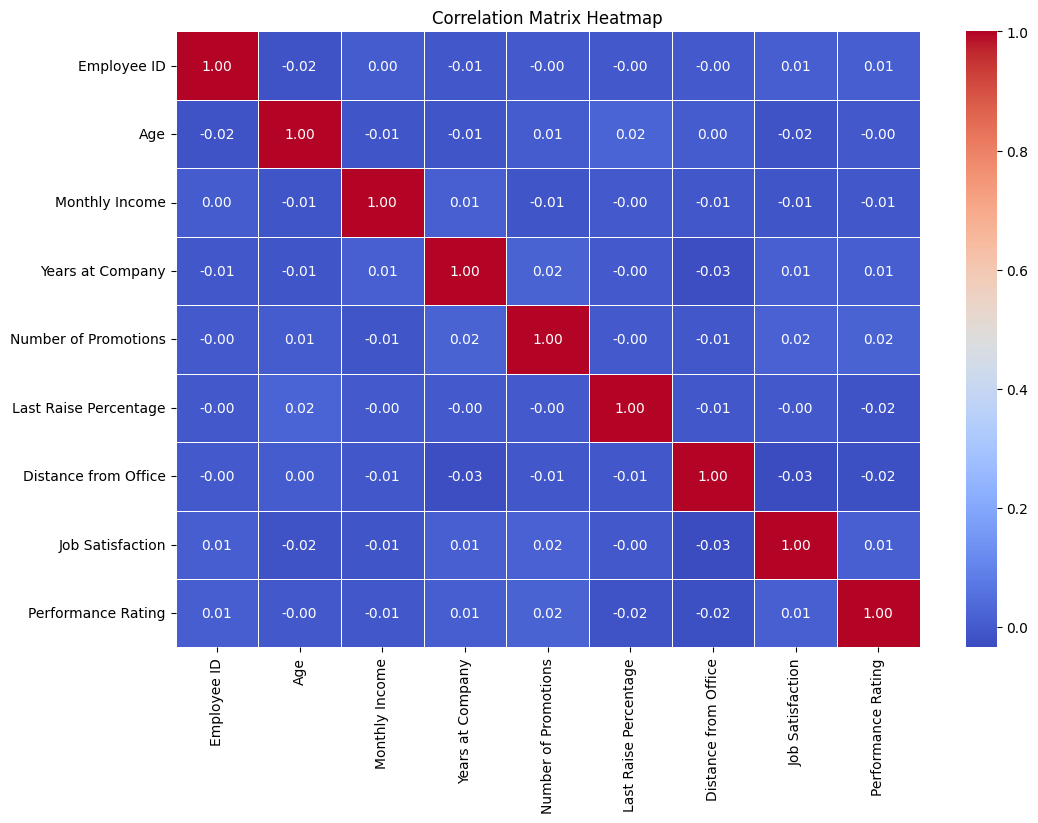

In [37]:

# 删除不需要的列
df_h = df.drop(['Gender', 'Job Role', 'Department','Attrition'], axis=1)

# 计算相关性矩阵
correlation_matrix = df_h.corr()

# 绘制热图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Feature Engineering

In [12]:
df['Job Role'].unique()

array(['HR', 'Sales', 'Technician', 'Engineer', 'Manager'], dtype=object)

In [14]:
df['Department'].unique()

array(['IT', 'Support', 'HR', 'Sales', 'Engineering'], dtype=object)

In [51]:
df

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition,Job Satisfaction Level
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No,high
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes,high
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No,low
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No,high
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,26,Female,Sales,Sales,6079,19,0,16.867011,34.311711,7,1,Yes,high
9996,9997,41,Female,Sales,HR,12946,11,2,19.361893,9.009338,2,1,No,low
9997,9998,35,Female,Technician,Engineering,12700,1,0,0.029159,12.949511,1,1,No,low
9998,9999,53,Male,Engineer,Support,12013,21,3,2.106378,50.000000,4,4,No,low


In [49]:
# 将 Job Satisfaction 分成 'low' 和 'high'
df['Job Satisfaction Level'] = df['Job Satisfaction'].apply(lambda x: 'low' if x <= 5 else 'high')

In [52]:
# 将 Job Satisfaction Level 列转换为二进制变量
df['Job Satisfaction Level'] = df['Job Satisfaction Level'].map({'low': 0, 'high': 1})

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [54]:
# Select the categorical variables that need to be converted into dummy variables
cat_col = ['Job Role', 'Department']

# Convert categorical variables into dummy variables
df_final = pd.get_dummies(df, columns=cat_col, drop_first=False, dtype=int)

df_final

,Employee ID,Age,Gender,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,...,Job Role_Engineer,Job Role_HR,Job Role_Manager,Job Role_Sales,Job Role_Technician,Department_Engineering,Department_HR,Department_IT,Department_Sales,Department_Support
0,1,50,1,11547,12,1,12.288783,41.307654,9,1,...,0,1,0,0,0,0,0,1,0,0
1,2,36,1,8643,28,4,3.496371,44.733204,8,1,...,0,0,0,1,0,0,0,0,0,1
2,3,29,1,12418,12,4,4.796945,18.646876,1,3,...,0,0,0,0,1,0,1,0,0,0
3,4,42,1,11441,25,1,10.310471,15.790848,8,4,...,0,0,0,0,1,0,0,0,0,1
4,5,40,0,9178,25,2,6.210127,41.239179,6,4,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,26,0,6079,19,0,16.867011,34.311711,7,1,...,0,0,0,1,0,0,0,0,1,0
9996,9997,41,0,12946,11,2,19.361893,9.009338,2,1,...,0,0,0,1,0,0,1,0,0,0
9997,9998,35,0,12700,1,0,0.029159,12.949511,1,1,...,0,0,0,0,1,1,0,0,0,0
9998,9999,53,1,12013,21,3,2.106378,50.000000,4,4,...,1,0,0,0,0,0,0,0,0,1


In [55]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Employee ID             10000 non-null  int64  
 1   Age                     10000 non-null  int64  
 2   Gender                  10000 non-null  int64  
 3   Monthly Income          10000 non-null  int64  
 4   Years at Company        10000 non-null  int64  
 5   Number of Promotions    10000 non-null  int64  
 6   Last Raise Percentage   10000 non-null  float64
 7   Distance from Office    10000 non-null  float64
 8   Job Satisfaction        10000 non-null  int64  
 9   Performance Rating      10000 non-null  int64  
 10  Attrition               10000 non-null  int64  
 11  Job Satisfaction Level  10000 non-null  int64  
 12  Job Role_Engineer       10000 non-null  int64  
 13  Job Role_HR             10000 non-null  int64  
 14  Job Role_Manager        10000 non-null 

In [56]:
df_final.head()

,Employee ID,Age,Gender,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,...,Job Role_Engineer,Job Role_HR,Job Role_Manager,Job Role_Sales,Job Role_Technician,Department_Engineering,Department_HR,Department_IT,Department_Sales,Department_Support
0,1,50,1,11547,12,1,12.288783,41.307654,9,1,...,0,1,0,0,0,0,0,1,0,0
1,2,36,1,8643,28,4,3.496371,44.733204,8,1,...,0,0,0,1,0,0,0,0,0,1
2,3,29,1,12418,12,4,4.796945,18.646876,1,3,...,0,0,0,0,1,0,1,0,0,0
3,4,42,1,11441,25,1,10.310471,15.790848,8,4,...,0,0,0,0,1,0,0,0,0,1
4,5,40,0,9178,25,2,6.210127,41.239179,6,4,...,1,0,0,0,0,0,0,0,1,0


In [59]:
df_final.columns

Index(['Employee ID', 'Age', 'Gender', 'Monthly Income', 'Years at Company',
       'Number of Promotions', 'Last Raise Percentage', 'Distance from Office',
       'Job Satisfaction', 'Performance Rating', 'Attrition',
       'Job Satisfaction Level', 'Job Role_Engineer', 'Job Role_HR',
       'Job Role_Manager', 'Job Role_Sales', 'Job Role_Technician',
       'Department_Engineering', 'Department_HR', 'Department_IT',
       'Department_Sales', 'Department_Support'],
      dtype='object')

In [99]:
df_final = df_final.drop(columns=['Job Satisfaction'])

KeyError: "['Job Satisfaction'] not found in axis"

# logistic

In [ ]:
X = df_final.drop(columns=['Attrition'])  # Feature variables
y = df_final['Attrition']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Fitting and Making Predictions for the adaboost model
logreg_model = LogisticRegression()

logreg_model.fit(X_train, y_train)

model_prediction = logreg_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Evaluating the model performance
model_accuracy = accuracy_score(y_test, model_prediction)
print(f'Model Accuracy: {model_accuracy}')

class_report = classification_report(y_test, model_prediction)
print(f'Classification Report: {class_report}')

y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_prediction))

Model Accuracy: 0.856
Classification Report:               precision    recall  f1-score   support

           0       0.86      1.00      0.92      2568
           1       0.00      0.00      0.00       432

    accuracy                           0.86      3000
   macro avg       0.43      0.50      0.46      3000
weighted avg       0.73      0.86      0.79      3000

Confusion Matrix:
[[2568    0]
 [ 432    0]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [ ]:
# Check for Overfitting with Cross-Validation
cv_scores = cross_val_score(logreg_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Cross-validation scores: [0.8595 0.8595 0.8605 0.8595 0.8595]
Mean cross-validation score: 0.8597000000000001


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

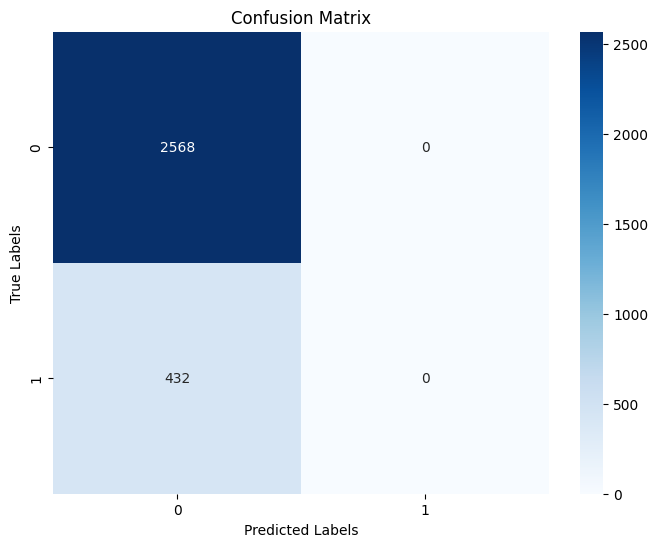

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, model_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

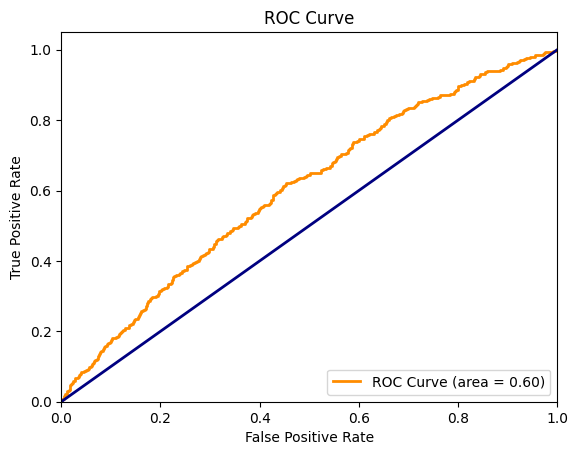

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Counting values correctly predicted by the Logistic Regression model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, model_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Logistic Regression Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Logistic Regression Model:
Number of Total Predictions: 3000
Number of Correct Predictions: 2568
Number of Wrong Predictions: 432


# KNN

In [100]:
# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Cross-validation evaluation model
cv_scores = cross_val_score(knn_model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

# Train the model
knn_model.fit(X_train, y_train)

# predict
y_pred_knn = knn_model.predict(X_test)
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_knn))

Cross-Validation Scores: [0.667  0.819  0.837  0.8575 0.8555]
Mean Cross-Validation Score: 0.8071999999999999
Confusion Matrix:
[[2502   66]
 [ 424    8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2568
           1       0.11      0.02      0.03       432

    accuracy                           0.84      3000
   macro avg       0.48      0.50      0.47      3000
weighted avg       0.75      0.84      0.78      3000


Accuracy Score:
0.8366666666666667


AUC Score: 0.60


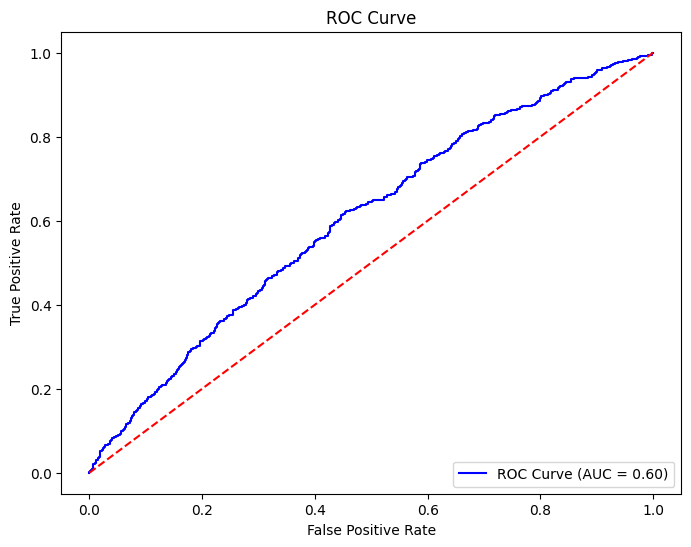

In [101]:
# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Print AUC value
print(f"AUC Score: {auc_score:.2f}")

# Draw ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()